## Basic Clasification Systems
Enrique Juliá Arévalo, Sara Verde Camacho, Leo Pérez Peña

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [40]:
breast_data = pd.read_csv('wdbc.csv', header=None)
prostate_data = pd. read_csv('prostate.csv')

In [41]:
X_breast = breast_data.values[:, 2:].astype(float)
y_breast = breast_data.values[:, 1] == 'B'
y_breast = y_breast.astype(int) # 0 when M and 1 when B
breast_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
print(prostate_data.head())
print(prostate_data.values[:, -1].sum()) 

   100_g_at   1000_at   1001_at  1002_f_at  1003_s_at   1004_at   1005_at  \
0  6.927460  7.391657  3.812922   3.453385   6.070151  5.527153  5.812353   
1  7.222432  7.329050  3.958028   3.407226   5.921265  5.376464  7.303408   
2  6.776402  7.664007  3.783702   3.152019   5.452293  5.111794  7.207638   
3  6.919134  7.469634  4.004581   3.341170   6.070925  5.296108  8.744059   
4  7.113561  7.322408  4.242724   3.489324   6.141657  5.628390  6.825370   

    1006_at  1007_s_at  1008_f_at  ...  AFFX-ThrX-5_at  AFFX-ThrX-M_at  \
0  3.167275   7.354981   9.419909  ...        3.770583        2.884436   
1  3.108708   7.391872  10.539579  ...        3.190759        2.460119   
2  3.077360   7.488371   6.833428  ...        3.325183        2.603014   
3  3.117104   7.203028  10.400557  ...        3.625057        2.765521   
4  3.794904   7.403024  10.240322  ...        3.698067        3.026876   

   AFFX-TrpnX-3_at  AFFX-TrpnX-5_at  AFFX-TrpnX-M_at  AFFX-YEL002c/WBP1_at  \
0         2.73

In [43]:
X_prostate = prostate_data.values[:,:-1].astype(float)
y_prostate = prostate_data.values[:,-1] == 0 # para tenerlo igual que el otro
                                             # 0 = tumor, 1 = tejido sano
y_prostate = y_prostate.astype(int) 

### Partición de los datos

Vamos a separar los datos en aquellos que utilizaremos para entrenar los modelos y para testarlos. Como se indica en el enunciado, emplearemos 1/3 para el test (0.33), y 2/3 para el entrenamiento.

In [94]:
breast_complete = []
for i in range(20):
    bre_X_train, bre_X_test, bre_y_train, bre_y_test = train_test_split( \
        X_breast, y_breast, test_size= 0.33)
    breast_complete.append([bre_X_train, bre_X_test, bre_y_train, bre_y_test])
    
prostate_complete = []
for i in range(20):
    pro_X_train, pro_X_test, pro_y_train, pro_y_test = train_test_split(\
        X_prostate, y_prostate, test_size= 0.33)
    prostate_complete.append([pro_X_train, pro_X_test, pro_y_train, pro_y_test])

### Normalización de los datos

Para realizar la normalización hemos ajustado los datos train y posteriormente hemos utilizado los parámetros obtenidos para transformar tanto los dataset de train como los de test. De esta forma podemos saber si los parámetros que se generan se ajustan bien a datos desconocidos (de los cuales no tenemos por qué conocer la media ni la desviación estándar). 

In [95]:
# breast dataset
for i in breast_complete:
    bre_X_train, bre_X_test, bre_y_train, bre_y_test=i
    scaler = preprocessing.StandardScaler().fit(bre_X_train)
    bre_X_train_scaled = scaler.transform(bre_X_train)
    bre_X_test_scaled = scaler.transform(bre_X_test)
    i.append(bre_X_train_scaled)
    i.append(bre_X_test_scaled)
    

In [96]:
# prostate dataset
for i in prostate_complete:
    pro_X_train, pro_X_test, pro_y_train, pro_y_test=i
    scaler = preprocessing.StandardScaler().fit(pro_X_train)
    pro_X_train_scaled = scaler.transform(pro_X_train)
    pro_X_test_scaled = scaler.transform(pro_X_test)
    i.append(pro_X_train_scaled)
    i.append(pro_X_test_scaled)

## Clasificador de Naive Bayes

In [99]:
nb = GaussianNB()
pred_accuracy=[]
for i in breast_complete:
    bre_X_train, bre_X_test, bre_y_train, bre_y_test, bre_X_train_scaled, bre_X_test_scaled=i
    nb.fit(bre_X_train_scaled, bre_y_train)
    bre_y_pred = nb.predict(bre_X_test_scaled)
    conf = confusion_matrix(bre_y_test, bre_y_pred)
    TN = conf[0][0]
    TP = conf[1][1]
    FP = conf[0][1]
    FN = conf[1][0]
    pred_accuracy.append(((TP + TN) / (TN + TP + FP + FN)))

pred_accuracy = np.array(pred_accuracy)
print(F"Prediction accuracy\nMEAN: {pred_accuracy.mean()}, SD: {pred_accuracy.std()}")

Prediction accuracy
MEAN: 0.9332446808510639, SD: 0.015459884712057056


In [100]:
pred_accuracy=[]
for i in prostate_complete:
    pro_X_train, pro_X_test, pro_y_train, pro_y_test, pro_X_train_scaled, pro_X_test_scaled=i
    nb.fit(pro_X_train_scaled, pro_y_train)
    pro_y_pred = nb.predict(pro_X_test_scaled)
    conf = confusion_matrix(pro_y_test, pro_y_pred)
    TN = conf[0][0]
    TP = conf[1][1]
    FP = conf[0][1]
    FN = conf[1][0]
    pred_accuracy.append(((TP + TN) / (TN + TP + FP + FN)))

pred_accuracy = np.array(pred_accuracy)
print(F"Prediction accuracy\nMEAN: {pred_accuracy.mean()}, SD: {pred_accuracy.std()}")

Prediction accuracy
MEAN: 0.638235294117647, SD: 0.07504324013042984


## Discriminant Analysis

In [101]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
import pandas as pd

### LDA

In [ ]:
lda = LinearDiscriminantAnalysis()


LinearDiscriminantAnalysis()

In [102]:
pred_accuracy=[]
for i in breast_complete:
    bre_X_train, bre_X_test, bre_y_train, bre_y_test, bre_X_train_scaled, bre_X_test_scaled=i
    lda.fit(bre_X_train_scaled, bre_y_train)
    bre_y_pred = lda.predict(bre_X_test_scaled)
    conf = confusion_matrix(bre_y_test, bre_y_pred)
    TN = conf[0][0]
    TP = conf[1][1]
    FP = conf[0][1]
    FN = conf[1][0]
    pred_accuracy.append(((TP + TN) / (TN + TP + FP + FN)))

pred_accuracy = np.array(pred_accuracy)
print(F"Prediction accuracy\nMEAN: {pred_accuracy.mean()}, SD: {pred_accuracy.std()}")

Prediction accuracy
MEAN: 0.9531914893617023, SD: 0.012765957446808512


In [103]:
pred_accuracy=[]
for i in prostate_complete:
    pro_X_train, pro_X_test, pro_y_train, pro_y_test, pro_X_train_scaled, pro_X_test_scaled=i
    lda.fit(pro_X_train_scaled, pro_y_train)
    pro_y_pred = lda.predict(pro_X_test_scaled)
    conf = confusion_matrix(pro_y_test, pro_y_pred)
    TN = conf[0][0]
    TP = conf[1][1]
    FP = conf[0][1]
    FN = conf[1][0]
    pred_accuracy.append(((TP + TN) / (TN + TP + FP + FN)))

pred_accuracy = np.array(pred_accuracy)
print(F"Prediction accuracy\nMEAN: {pred_accuracy.mean()}, SD: {pred_accuracy.std()}")

Prediction accuracy
MEAN: 0.8573529411764707, SD: 0.049456387414118334


### QDA

In [69]:
pipeline = Pipeline([ ('qda', QuadraticDiscriminantAnalysis()) ])

In [70]:
reg_param_values = np.linspace(0, 1, 10).tolist()
param_grid = { 'qda__reg_param': reg_param_values }

In [71]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)
gridcv = GridSearchCV(pipeline, cv=skfold, n_jobs=1, param_grid=param_grid, \
    scoring=make_scorer(accuracy_score))
result = gridcv.fit(bre_X_train_scaled, bre_y_train)

In [72]:
accuracies = gridcv.cv_results_['mean_test_score']
std_accuracies = gridcv.cv_results_['std_test_score']

In [74]:
test_accuracies = np.ones(len(reg_param_values))

for i in range(len(reg_param_values)):
    qda = QuadraticDiscriminantAnalysis(reg_param = reg_param_values[ i ])
    qda.fit(bre_X_train_scaled, bre_y_train)
    test_accuracies[ i ] = accuracy_score(qda.predict(bre_X_test_scaled), bre_y_test)

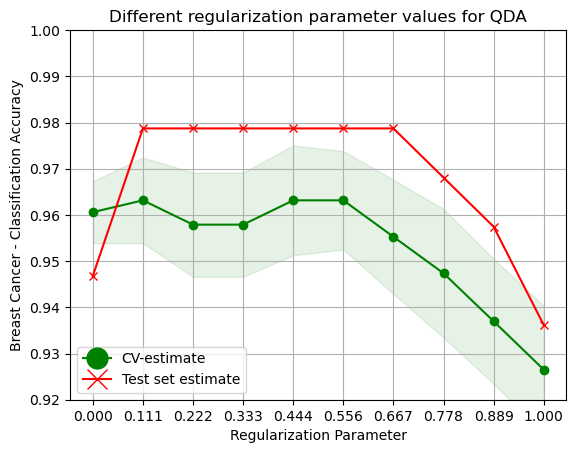

In [75]:
plt.figure()
line1, = plt.plot(reg_param_values, accuracies, 'o-', color="g")
line2, = plt.plot(reg_param_values, test_accuracies, 'x-', color="r")
plt.fill_between(reg_param_values, accuracies - std_accuracies / np.sqrt(10), \
    accuracies + std_accuracies / np.sqrt(10), alpha=0.1, color="g")
plt.grid()
plt.title("Different regularization parameter values for QDA")
plt.xlabel('Regularization Parameter')
plt.xticks(np.array(reg_param_values))
plt.ylabel('Breast Cancer - Classification Accuracy')
plt.ylim((0.92, 1.0))
legend_handles = [ mlines.Line2D([], [], color='g', marker='o', \
                          markersize=15, label='CV-estimate'), \
                mlines.Line2D([], [], color='r', marker='x', \
                          markersize=15, label='Test set estimate')]
plt.legend(handles=legend_handles, loc = 3)
plt.show()

In [76]:
best_reg_param_value = 0.556

In [79]:
qda = QuadraticDiscriminantAnalysis(reg_param = best_reg_param_value)
qda.fit(bre_X_train_scaled, bre_y_train)
y_pred = qda.predict(bre_X_test_scaled)
conf = confusion_matrix(bre_y_test, y_pred)

In [80]:
TN = conf[0][0]
TP = conf[1][1]
FP = conf[0][1]
FN = conf[1][0]

print(conf)
print('Predicion accuracy is: %f' % ((TP + TN) / (TN + TP + FP + FN)))
print('True postive rate is: %f' % (TP / (TP + FN)))
print('True negative rate is: %f\n' % (TN / (TN + FP)))

[[ 61   4]
 [  0 123]]
Predicion accuracy is: 0.978723
True postive rate is: 1.000000
True negative rate is: 0.938462



## Clasificador de Nearest Shrunken Centroids